In [245]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import linregress
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


def set_default_plot_style():
    plt.style.use("default")  # start clean

    plt.rcParams["axes.grid"] = True
    plt.rcParams["grid.alpha"] = 0.2
    plt.rcParams["grid.linestyle"] = "-"
    plt.rcParams["grid.color"] = "gray"

    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

    plt.rcParams["axes.linewidth"] = 1.2

    plt.rcParams["legend.frameon"] = False

    plt.rcParams["font.size"] = 16
    plt.rcParams["axes.labelsize"] = 24
    plt.rcParams["legend.fontsize"] = 18

    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']

# Call once at the top of your script
set_default_plot_style()


In [272]:

N_val = 4
base_data_path = f"../data/s_diff_per_time/N{N_val}"

def parse_a_val(a_str):
    return float(a_str.replace("p", "."))

def parse_z_val(z_str):
    return float(z_str.replace("p", "."))

a_vals = [0.2, 0.4, 0.6, 0.7, 0.8, 0.9]
L_vals = [32, 64, 128]
cmap = [
    (0.30, 0.20, 0.12, 1),  # burned umber
    (0.45, 0.29, 0.17, 1),  # clay
    (0.60, 0.40, 0.23, 1),  # canyon
    (0.73, 0.54, 0.30, 1),  # sandstone
    (0.85, 0.72, 0.47, 1),  # wheat
    (0.92, 0.84, 0.63, 1),  # parchment
]
cmap.reverse()

In [167]:
s_diffs_per_time = {}
s_errs_per_time = {}
for a_folder in os.listdir(base_data_path):
    if not a_folder.startswith("a"):
        continue

    a_val = parse_a_val(a_folder[1:])
    a_path = os.path.join(base_data_path, a_folder, "IC1")

    if not os.path.isdir(a_path):
        continue

    print(f"Found a = {a_val}")

    for L_folder in os.listdir(a_path):
        if not L_folder.startswith("L"):
            continue

        L_val = int(L_folder[1:])
        L_path = os.path.join(a_path, L_folder)

        print(f"  L = {L_val}")

        sample_files = [
            f for f in os.listdir(L_path)
            if f.endswith(".csv")
        ]

        if len(sample_files) == 0:
            print(f"    WARNING: No CSVs found for L={L_val}, a={a_val}")
            continue

        all_samples = []

        for sample_file in sample_files:
            file_path = os.path.join(L_path, sample_file)
            df = pd.read_csv(file_path)

            # load as numpy array
            s_vals = df["s_diff"].values.astype(float)
            all_samples.append(s_vals)

        data_matrix = np.vstack(all_samples)

        avg_vals = np.mean(data_matrix, axis=0)
        err_vals = np.std(data_matrix, axis=0, ddof=1) / np.sqrt(len(all_samples))

        s_diffs_per_time[(L_val, a_val)] = avg_vals
        s_errs_per_time[(L_val, a_val)] = err_vals

        print(f"Loaded {len(all_samples)} samples.")


print("\n==== Summary Loaded ====")
for (L_val, a_val), arr in s_diffs_per_time.items():
    print(f"(L={L_val}, a={a_val}) → {len(arr)} timepoints")

print("\nDictionaries Ready:")
print(" - s_diffs_per_time[(L,a)]")
print(" - s_errs_per_time[(L,a)]")

Found a = 0.7
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.
Found a = 0.9
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.
Found a = 0.8
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.
Found a = 0.6
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.
Found a = 0.4
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.
Found a = 0.2
  L = 32
Loaded 1000 samples.
  L = 128
Loaded 1000 samples.
  L = 64
Loaded 1000 samples.

==== Summary Loaded ====
(L=32, a=0.7) → 256 timepoints
(L=128, a=0.7) → 2353 timepoints
(L=64, a=0.7) → 776 timepoints
(L=32, a=0.9) → 256 timepoints
(L=128, a=0.9) → 2353 timepoints
(L=64, a=0.9) → 776 timepoints
(L=32, a=0.8) → 256 timepoints
(L=128, a=0.8) → 2353 timepoints
(L=64, a=0.8) → 776 timepoints
(L=32, a=0.6) → 256 timepoints
(L=128, a=0.6) → 2353 timepo

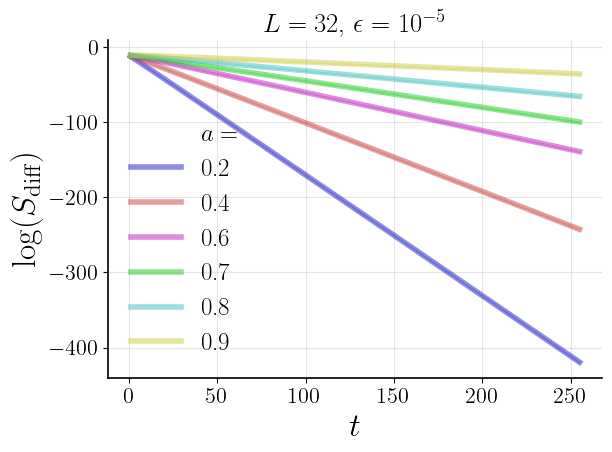

/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:7: RuntimeWarning: divide by zero encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:7: RuntimeWarning: overflow encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:7: RuntimeWarning: invalid value encountered in multiply
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(times, np.log(s_diff_data[1:t_limit]), label=f"{a_val}", color=c, linewidth=4, alpha=0.5)
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:14: RuntimeWarning: divide by zero encountered in log

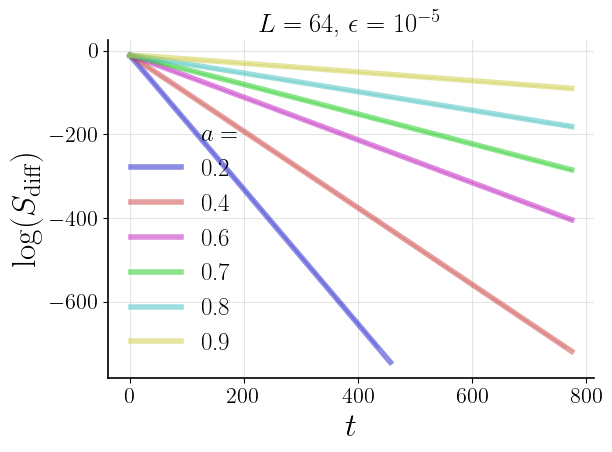

/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:7: RuntimeWarning: divide by zero encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:7: RuntimeWarning: overflow encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:7: RuntimeWarning: invalid value encountered in multiply
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(times, np.log(s_diff_data[1:t_limit]), label=f"{a_val}", color=c, linewidth=4, alpha=0.5)
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/3760001141.py:14: RuntimeWarning: divide by zero encountered in log

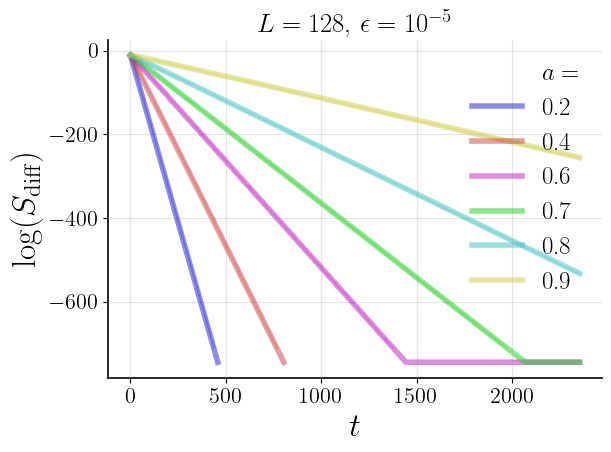

In [211]:
for L_val in L_vals:
    plt.plot([], [], c = (0, 0, 0, 0), label=r"$a = $")
    t_limit = int(L_val ** 1.6)
    for i, a_val in enumerate(a_vals):
        c = cmap[i]
        s_diff_data = np.array(s_diffs_per_time[(L_val, a_val)])
        log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])

        times = [i for i in range(len(s_diff_data))][1:t_limit]
        
        # Plot actuall data
        plt.plot(times, np.log(s_diff_data[1:t_limit]), label=f"{a_val}", color=c, linewidth=4, alpha=0.5)
        plt.fill_between(times,
                         (np.log(s_diff_data) + log_sdiff_err)[1:t_limit],
                         (np.log(s_diff_data) - log_sdiff_err)[1:t_limit], color=c, alpha=0.25)
        
    # plt.ylim(-500,0)
    plt.title(rf"$L = {L_val}$, $\epsilon = 10^{{-5}}$")
    plt.legend()
    plt.xlabel(r"$t$")
    plt.ylabel(r"$\log(S_{\mathrm{diff}})$")
    parent_path = "../figs/other/"
    os.makedirs(parent_path, exist_ok=True)
    plt.tight_layout()
    # plt.savefig(f"{parent_path}s_diff_at_const_dists_L{L_val}.png")
    plt.show()

In [213]:
hard_t_limits = {
    32: {0.2: 32**1.6, 0.4: 32**1.6, 0.6: 32**1.6, 0.7: 32**1.6, 0.8: 32**1.6, 0.9: 32**1.6},
    64: {0.2: 400, 0.4: 700, 0.6: 700, 0.7: 700, 0.8: 700, 0.9: 700},
    128: {0.2: 400, 0.4: 600, 0.6: 1200, 0.7: 2000, 0.8: 128**1.6, 0.9: 128**1.6},
}

In [168]:
s_diffs_per_time

{(32,
  0.7): array([1.00000000e-05, 1.15335256e-05, 9.05638994e-06, 7.26328222e-06,
        5.47180771e-06, 4.16583786e-06, 3.02100726e-06, 2.25371367e-06,
        1.67627416e-06, 1.21745316e-06, 8.80260428e-07, 6.47009368e-07,
        4.62897717e-07, 3.39050756e-07, 2.42701145e-07, 1.74782689e-07,
        1.24606220e-07, 8.91981372e-08, 6.37295942e-08, 4.53658079e-08,
        3.22074516e-08, 2.27759441e-08, 1.64277776e-08, 1.17358541e-08,
        8.30841167e-09, 5.96379538e-09, 4.24284854e-09, 3.06025765e-09,
        2.16689485e-09, 1.55507289e-09, 1.11796240e-09, 7.99353892e-10,
        5.69988675e-10, 4.03632417e-10, 2.82925118e-10, 2.01250451e-10,
        1.43091266e-10, 1.01341487e-10, 7.19843470e-11, 5.09220850e-11,
        3.56703449e-11, 2.51592197e-11, 1.78040020e-11, 1.25340015e-11,
        8.85710942e-12, 6.30368213e-12, 4.47229227e-12, 3.15336847e-12,
        2.22186555e-12, 1.57097341e-12, 1.10329081e-12, 7.84152865e-13,
        5.51622735e-13, 3.91726159e-13, 2.77592338e

In [215]:
# Get the fits
slope_fits = {}
for L_val in L_vals:
    for i, a_val in enumerate(a_vals):
        t_lim = int(hard_t_limits[L_val][a_val])
        s_diff_data = np.array(s_diffs_per_time[(L_val, a_val)])
        times = [i for i in range(len(s_diff_data))]
        result = linregress(times[20:t_lim], np.log(s_diff_data[20:t_lim]))
        slope_fits[(L_val, a_val)] = [result.slope, result.intercept, result.stderr]
slope_fits

{(32, 0.2): [np.float64(-1.6050916419092849),
  np.float64(-9.860812659491643),
  np.float64(8.75921295484967e-05)],
 (32, 0.4): [np.float64(-0.9120204695307943),
  np.float64(-9.876201734154762),
  np.float64(7.23338216772449e-05)],
 (32, 0.6): [np.float64(-0.5066176741972752),
  np.float64(-9.85896881987388),
  np.float64(8.461822381053964e-05)],
 (32, 0.7): [np.float64(-0.35235208267701884),
  np.float64(-9.875964635488344),
  np.float64(8.216144280515175e-05)],
 (32, 0.8): [np.float64(-0.21885427325052886),
  np.float64(-9.87207518435483),
  np.float64(7.558167632846135e-05)],
 (32, 0.9): [np.float64(-0.10118946139177533),
  np.float64(-9.865166324787682),
  np.float64(8.05184890562562e-05)],
 (64, 0.2): [np.float64(-1.6065771418256183),
  np.float64(-9.73091742809197),
  np.float64(4.774936318956757e-05)],
 (64, 0.4): [np.float64(-0.9143714548512611),
  np.float64(-9.538613915161363),
  np.float64(2.822296504436834e-05)],
 (64, 0.6): [np.float64(-0.5090281108122654),
  np.float64(

0.2 -1.6050916419092849
0.4 -0.9120204695307943
0.6 -0.5066176741972752
0.7 -0.35235208267701884
0.8 -0.21885427325052886
0.9 -0.10118946139177533


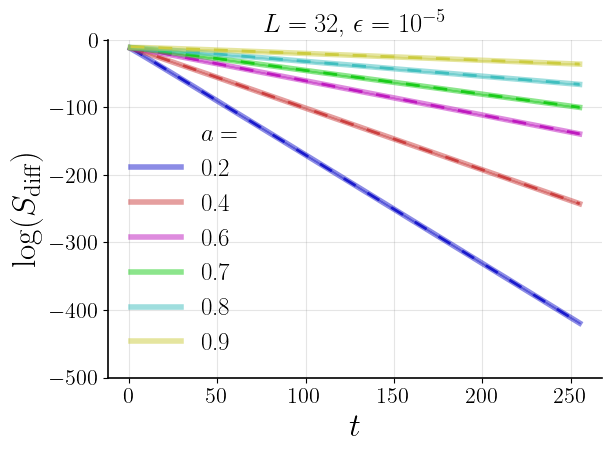

0.2 -1.6065771418256183
0.4 -0.9143714548512611
0.6 -0.5090281108122654
0.7 -0.3548112171318806
0.8 -0.2213293879146107
0.9 -0.10355346281226019


/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1741116893.py:7: RuntimeWarning: divide by zero encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1741116893.py:7: RuntimeWarning: overflow encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1741116893.py:7: RuntimeWarning: invalid value encountered in multiply
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1741116893.py:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(times, np.log(s_diff_data[1:t_limit]), label=f"{a_val}", color=c, linewidth=4, alpha=0.5)
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/1741116893.py:14: RuntimeWarning: divide by zero encountered in log

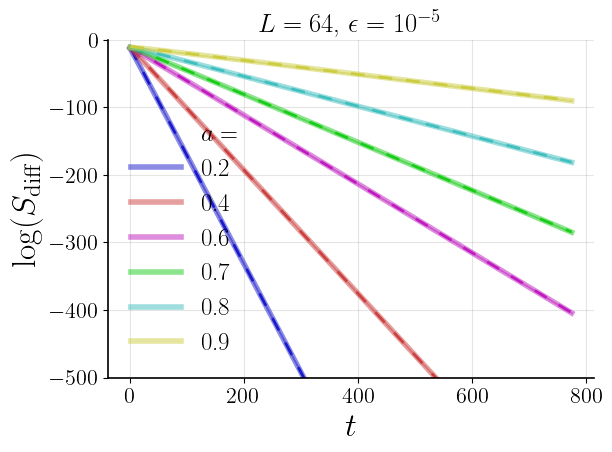

0.2 -1.6065548509788579
0.4 -0.9142750048270787
0.6 -0.5097237618932565
0.7 -0.3559549953521242
0.8 -0.2225585138569163
0.9 -0.10473463442581353


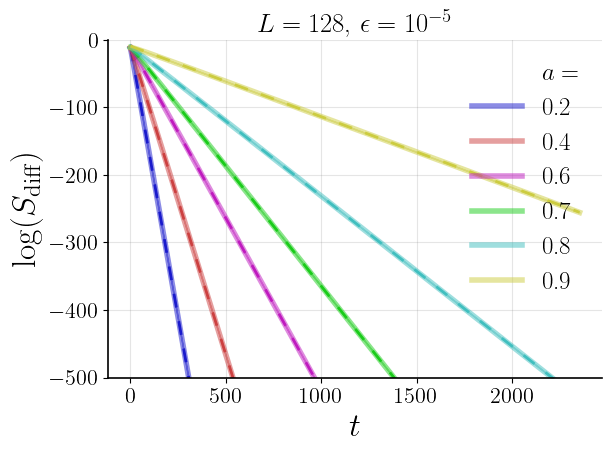

In [230]:
for L_val in L_vals:
    plt.plot([], [], c = (0, 0, 0, 0), label=r"$a = $")
    t_limit = int(L_val ** 1.6)
    for i, a_val in enumerate(a_vals):
        c = cmap[i]
        s_diff_data = np.array(s_diffs_per_time[(L_val, a_val)])
        log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val, a_val)])

        times = [i for i in range(len(s_diff_data))][1:t_limit]
        
        # Plot actuall data
        plt.plot(times, np.log(s_diff_data[1:t_limit]), label=f"{a_val}", color=c, linewidth=4, alpha=0.5)
        plt.fill_between(times,
                         (np.log(s_diff_data) + log_sdiff_err)[1:t_limit],
                         (np.log(s_diff_data) - log_sdiff_err)[1:t_limit], color=c, alpha=0.25)
        offset = slope_fits[(L_val, a_val)][1]
        slope = slope_fits[(L_val, a_val)][0]
        slope_err = slope_fits[(L_val, a_val)][2]
        print(a_val, slope)
        plt.plot(times, slope * np.array(times) + offset, color=c, linestyle = "--", linewidth=2, dashes=(5, 5))
        plt.fill_between(times,
                         ((slope+slope_err) * np.array(times) + offset),
                         ((slope-slope_err) * np.array(times) + offset), color=c, alpha=0.25)
    plt.ylim(-500,0)
    plt.title(rf"$L = {L_val}$, $\epsilon = 10^{{-5}}$")
    plt.legend()
    plt.xlabel(r"$t$")
    plt.ylabel(r"$\log(S_{\mathrm{diff}})$")
    parent_path = "../figs/other/"
    os.makedirs(parent_path, exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"{parent_path}s_diff_at_const_dists_L{L_val}.png")
    plt.show()

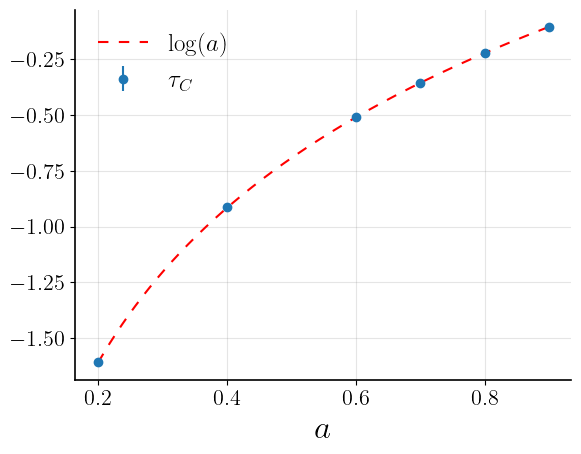

In [234]:
a_range = np.linspace(min(a_vals), max(a_vals), 1000)
L_val_for_inset = 128
plt.plot(a_range, np.log(a_range), label=r"$\log(a)$", linestyle="--", dashes=(5, 5), color="r")
slope_data = [slope_fits[(L_val_for_inset, a_val)][0] for a_val in a_vals]
slope_err = [slope_fits[(L_val_for_inset, a_val)][2] for a_val in a_vals]

plt.errorbar(a_vals, slope_data, yerr=slope_err, marker="o", label=r"$\tau_C$", linestyle="")
plt.xlabel(r"$a$")
plt.legend()

/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/174899434.py:10: RuntimeWarning: divide by zero encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val_to_plot, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/174899434.py:10: RuntimeWarning: overflow encountered in divide
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val_to_plot, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/174899434.py:10: RuntimeWarning: invalid value encountered in multiply
  log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val_to_plot, a_val)])
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/174899434.py:15: RuntimeWarning: divide by zero encountered in log
  plt.plot(times, np.log(s_diff_data[1:t_limit]), label=f"{a_val}", color=c, linewidth=4, alpha=0.5)
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_20212/174899434.py:17: RuntimeWarning: divide by z

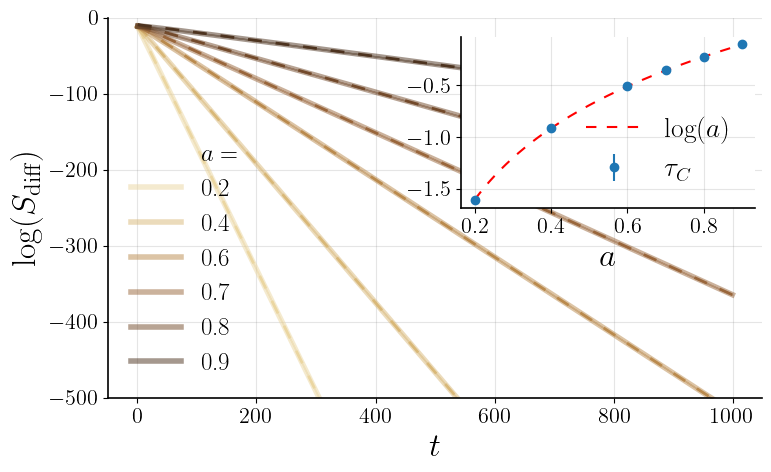

In [278]:

L_val_to_plot=128
plt.figure(figsize=(8,5))

plt.plot([], [], c = (0, 0, 0, 0), label=r"$a = $")
t_limit = int(1000)

for i, a_val in enumerate(a_vals):
    c = cmap[i]
    s_diff_data = np.array(s_diffs_per_time[(L_val_to_plot, a_val)])
    log_sdiff_err = (1/s_diff_data) * np.array(s_errs_per_time[(L_val_to_plot, a_val)])

    times = np.arange(len(s_diff_data))[1:t_limit]
    
    # Plot actual data
    plt.plot(times, np.log(s_diff_data[1:t_limit]), label=f"{a_val}", color=c, linewidth=4, alpha=0.5)
    plt.fill_between(times,
                     (np.log(s_diff_data) + log_sdiff_err)[1:t_limit],
                     (np.log(s_diff_data) - log_sdiff_err)[1:t_limit],
                     color=c, alpha=0.25)

    offset = slope_fits[(L_val_to_plot, a_val)][1]
    slope = slope_fits[(L_val_to_plot, a_val)][0]
    slope_err = slope_fits[(L_val_to_plot, a_val)][2]

    plt.plot(times, slope * times + offset, color=c, linestyle="--", linewidth=2, dashes=(5, 5))
    plt.fill_between(times,
                     (slope + slope_err) * times + offset,
                     (slope - slope_err) * times + offset,
                     color=c, alpha=0.25)

plt.ylim(-500, 0)
# plt.title(rf"$L = {L_val_to_plot}$, $\epsilon = 10^{{-5}}$")
plt.legend()
plt.xlabel(r"$t$")
plt.ylabel(r"$\log(S_{\mathrm{diff}})$")

# --------------- INSET -----------------
ax_inset = inset_axes(
    plt.gca(), width="45%", height="45%",
    loc="upper right", 
    bbox_to_anchor=(-0.01, -0.05, 1, 1),   # (x0, y0, width, height) relative to axes
    bbox_transform=plt.gca().transAxes,
    borderpad=0
)

a_range = np.linspace(min(a_vals), max(a_vals), 1000)
L_val_for_inset = 128

ax_inset.plot(a_range, np.log(a_range), label=r"$\log(a)$", linestyle="--", dashes=(5, 5), color="r")

slope_data = [slope_fits[(L_val_for_inset, a_val)][0] for a_val in a_vals]
slope_err  = [slope_fits[(L_val_for_inset, a_val)][2] for a_val in a_vals]

ax_inset.errorbar(a_vals, slope_data, yerr=slope_err, marker="o", linestyle="", label=r"$\tau_C$")
ax_inset.set_xlabel(r"$a$")
ax_inset.legend(fontsize=20)

# --------------- SAVE -----------------
parent_path = "../figs/other/"
os.makedirs(parent_path, exist_ok=True)
plt.tight_layout()
plt.savefig(f"{parent_path}s_diff_at_const_dists_inset_L{L_val_to_plot}.png")
plt.show()